# Visualising the Data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the dataframes from Excel files. We do this for the 'Categories' data and the cleaned dataset

The Excel files used were cleaned and prepared in preparation for the visualisation of the data.

In [5]:
clean_df = pd.read_excel('cleaned.xlsx')

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2020-12-07 06:27:54,photo,studying,neutral,35
6,97522e57-d9ab-4bd6-97bf-c24d952602d2,cherish,2021-04-11 17:35:49,photo,studying,positive,70
7,97522e57-d9ab-4bd6-97bf-c24d952602d2,hate,2021-01-27 08:32:09,photo,studying,negative,5
8,97522e57-d9ab-4bd6-97bf-c24d952602d2,peeking,2021-04-01 22:54:23,photo,studying,neutral,35
9,97522e57-d9ab-4bd6-97bf-c24d952602d2,love,2020-08-04 05:05:02,photo,studying,positive,65


In [6]:
categories = pd.read_excel('category_scores.xlsx')

## Create a Bar Chart showing all the categories and their scores

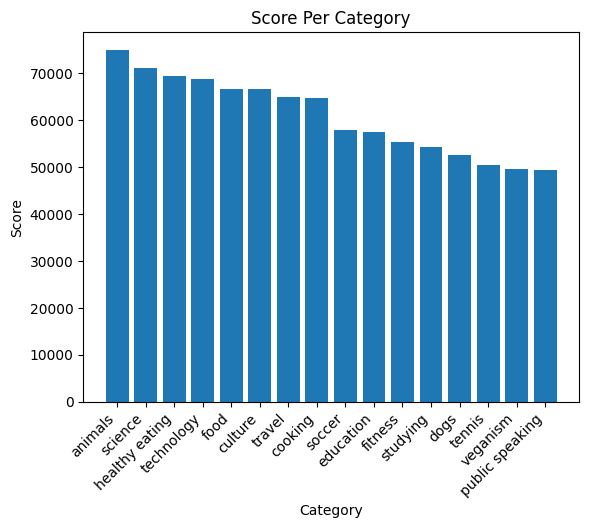

In [11]:
plt.bar(categories['Category'], categories['Score'])

# add labels and title
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Score Per Category')
plt.xticks(range(len(categories['Category'])), categories['Category'], rotation=45, ha='right')
# display chart
plt.show()

In [33]:
categories

,Category,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676
5,culture,66579
6,travel,64880
7,cooking,64756
8,soccer,57783
9,education,57436


In [32]:
counts = clean_df['Reaction Type'].value_counts()
counts

heart          1622
scared         1572
peeking        1559
hate           1552
interested     1549
dislike        1548
adore          1548
want           1539
love           1534
disgust        1526
like           1520
super love     1519
indifferent    1512
cherish        1501
worried        1497
intrigued      1475
Name: Reaction Type, dtype: int64

## Determining the number of reactions to the most popular category

The most popular category was 'animals' with 1897 reactions.

In [42]:
most_pop = clean_df['Category'].value_counts()
most_pop = most_pop.to_frame()
most_pop = most_pop.rename(columns={'': 'Category', 'Category': 'Number of Reactions'})
most_pop

,Number of Reactions
animals,1897
science,1796
healthy eating,1717
food,1699
technology,1698
culture,1676
cooking,1664
travel,1647
soccer,1457
education,1433
